In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
import networkx as nx
import pandas as pd
import seaborn as sns
import os
import scipy
import string

from functions.plotting_tools import set_layout
from functions.statistical_analysis import comparison_distributions
from functions.statistical_analysis import correlate

## ROBUSTNESS ANALYSIS
### COMPARISON ENTANGLED FRACTION FROM HI-C AND PDB STRUCTURES

Circuit topology can be applied to both 3D structures of chromosomes and Contact maps, such as single cell Hi-C maps. In the former case, an extra step is necessary: finding the contacts in the chain. In this notebook we compare the results obtained using the two methods; specifically, compare the entangled topological fraction retrieved in the two cases. The spatial cutoff radius used to analyze the 3D structures is 1.75. We chose this number because it yielded the most similar amount of contacts to the Hi-C contact lists.

Load topological parameters from 3D structures

In [3]:
path='results'
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']
len_dataset=len(files_csv)
df_PDB=pd.DataFrame()

for t in range(len_dataset): 
    stats= pd.read_csv('{}/{}'.format(path, files_csv[t]))
    frames=[df_PDB, stats]
    df_PDB = pd.concat(frames)
    
#Define entangled fraction    
df_PDB['Entangled fraction (%)']=df_PDB['Cross (%)'] + df_PDB['Parallel (%)']
cells= np.unique(df_PDB['Cell'])

Load topological parameters from Hi-C contact lists

In [4]:
path='Hi-C map/results'
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']
len_dataset=len(files_csv)
df_HiC=pd.DataFrame()

for t in range(len_dataset): 
    stats= pd.read_csv('{}/{}'.format(path, files_csv[t]))
    frames=[df_HiC, stats]
    df_HiC = pd.concat(frames)
    
df_HiC['Entangled fraction (%)']=df_HiC['Cross (%)'] + df_HiC['Parallel (%)']    

Entangled fraction per cell: comparison

Text(0.5, 0, 'cell')

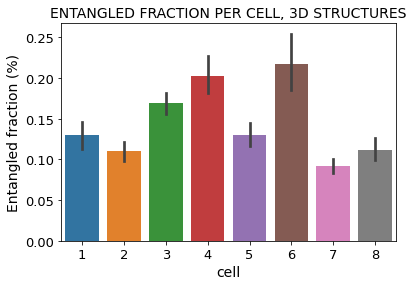

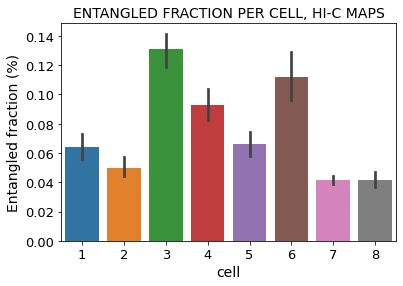

In [5]:
set_layout()

plt.figure()
ax = sns.barplot(x="Cell", y="Entangled fraction (%)", data=df_PDB)
locs, labels = plt.xticks()
xticks_pos=np.linspace(0,len(cells)-1,len(cells), dtype = int)
xticks_labels=['{}'.format(xtick + 1) for xtick in xticks_pos]
plt.xticks(xticks_pos, xticks_labels)
plt.xlabel('cell')
plt.title('ENTANGLED FRACTION PER CELL, 3D STRUCTURES')

#plt.savefig('results/figures/entangled_percell_3D.jpg')
#plt.savefig('results/figures/entangled_percell_3D.eps', bbox_inches='tight')

plt.figure()
ax = sns.barplot(x="Cell", y="Entangled fraction (%)", data=df_HiC)
plt.title('ENTANGLED FRACTION PER CELL, HI-C MAPS')
locs, labels = plt.xticks()
plt.xticks(xticks_pos, xticks_labels)
plt.xlabel('cell')

#plt.savefig('results/figures/entangled_percell_HiC.jpg')
#plt.savefig('results/figures/entangled_percell_HiC.eps', bbox_inches='tight')

Entangled fraction per chromosome: comparison

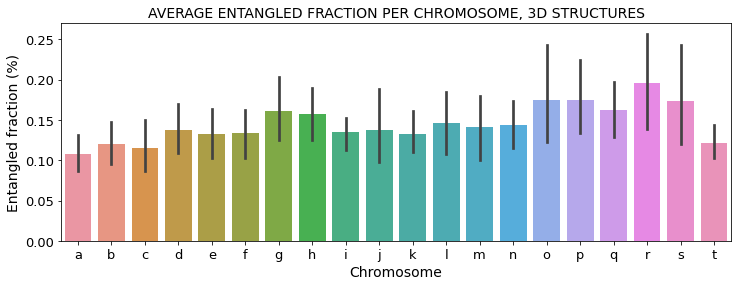

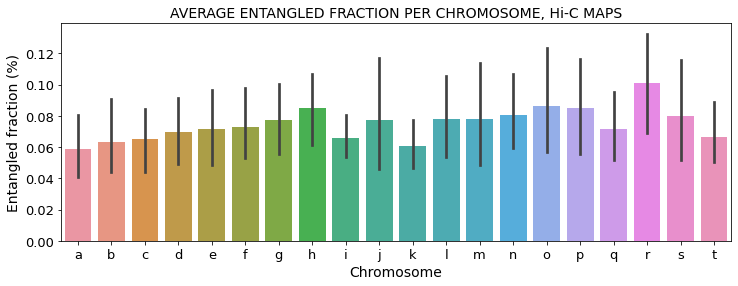

In [6]:
#ENTANGLED FRACTION PER CHROMOSOME
set_layout()

plt.figure(num=None, figsize=(12,4))
ax = sns.barplot(x="Chromosome", y="Entangled fraction (%)", data=df_PDB)
plt.title('AVERAGE ENTANGLED FRACTION PER CHROMOSOME, 3D STRUCTURES')
locs, labels = plt.xticks()  
letters=list(string.ascii_lowercase)
plt.xticks(np.arange(20), letters[0:20]);

#plt.savefig("results/figures/entangled_perchrom_3D.jpg")
#plt.savefig("results/figures/entangled_perchrom_3D.eps",bbox_inches='tight')

plt.figure(num=None, figsize=(12,4))
ax = sns.barplot(x="Chromosome", y="Entangled fraction (%)", data=df_HiC)
plt.title('AVERAGE ENTANGLED FRACTION PER CHROMOSOME, Hi-C MAPS')
locs, labels = plt.xticks()  
letters=list(string.ascii_lowercase)
plt.xticks(np.arange(20), letters[0:20]);

#plt.savefig("results/figures/entangled_perchrom_HiC.jpg")
#plt.savefig("results/figures/entangled_perchrom_HiC.eps",bbox_inches='tight')

SCATTERPLOT ENTANGLED FRACTION (3D STRUCTURE VS HI-C MAPS)

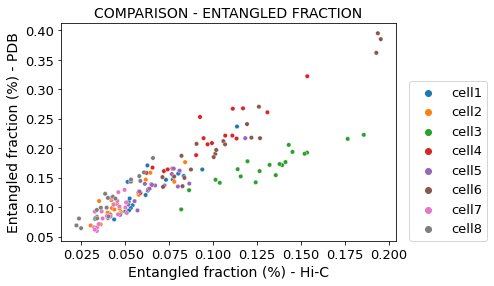

In [7]:
set_layout()

plt.figure()
sns.scatterplot(x = df_HiC['Entangled fraction (%)'], y = df_PDB['Entangled fraction (%)'], hue= df_PDB['Cell'],
                s = 20)
plt.title('COMPARISON - ENTANGLED FRACTION')
plt.xlabel('Entangled fraction (%) - Hi-C')
plt.ylabel('Entangled fraction (%) - PDB')
plt.legend(loc=(1.04,0))

#plt.savefig("results/figures/Comparison_entangledfraction.jpg",bbox_inches='tight')
#plt.savefig("results/figures/Comparison_entangledfraction.eps",bbox_inches='tight')

Cell 3 behaves differently from the others. There is proportionality between the entangled fraction calculated with the two methods, but it follows a different law. Therefore, we separate this particular cell from the rest for following analysis.

In [19]:
dfPDB_nocell3=df_PDB[df_PDB['Cell']!='cell3']
dfHic_nocell3=df_HiC[df_HiC['Cell']!='Cell_3']
dfPDB_cell3=df_PDB[df_PDB['Cell']=='cell3']
dfHic_cell3=df_HiC[df_HiC['Cell']=='Cell_3']

CORRELATION BETWEEN ENTANGLED FRACTION FROM 3D STRUCTURES AND FROM Hi-C MAPS, EXCLUDING CELL 3

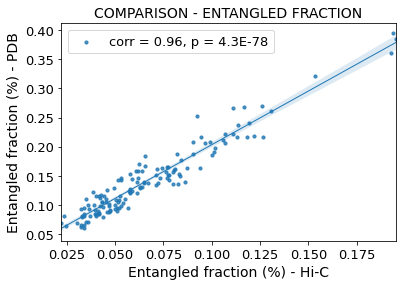

In [23]:
plt.figure()

corr_coeff, p_value = correlate(dfHic_nocell3['Entangled fraction (%)'], dfPDB_nocell3['Entangled fraction (%)'])

sns.regplot(x = dfHic_nocell3['Entangled fraction (%)'], y=dfPDB_nocell3['Entangled fraction (%)'], 
            label= 'corr = {}, p = {}'.format(corr_coeff, p_value), scatter_kws={'s':10}, line_kws={'linewidth':1})

plt.title('COMPARISON - ENTANGLED FRACTION')
plt.xlabel('Entangled fraction (%) - Hi-C')
plt.ylabel('Entangled fraction (%) - PDB')
plt.legend();

#plt.savefig("results/figures/Comparison_nocell3.jpg",bbox_inches='tight')
#plt.savefig("results/figures/Comparison_nocell3.eps",bbox_inches='tight')

CORRELATION BETWEEN ENTANGLED FRACTION FROM 3D STRUCTURES AND FROM Hi-C MAPS, CELL 3

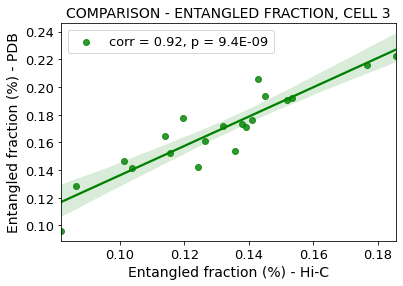

In [22]:
plt.figure()

corr_coeff,p_value  = correlate(dfHic_cell3['Entangled fraction (%)'], dfPDB_cell3['Entangled fraction (%)'])

sns.regplot(x = dfHic_cell3['Entangled fraction (%)'], y=dfPDB_cell3['Entangled fraction (%)'], 
            label= 'corr = {}, p = {}'.format(corr_coeff, p_value), color= 'g')

plt.title('COMPARISON - ENTANGLED FRACTION, CELL 3')
plt.xlabel('Entangled fraction (%) - Hi-C')
plt.ylabel('Entangled fraction (%) - PDB')
plt.legend();

#plt.savefig("results/figures/Comparison_cell3.jpg",bbox_inches='tight')
#plt.savefig("results/figures/Comparison_cell3.eps",bbox_inches='tight')